# Proyecto integrado

¡Enhorabuena! Has completado oficialmente la primera parte del curso en la plataforma interactiva. Llegó la hora de reunir todo lo que has aprendido hasta el momento en tu primer proyecto integrado, un estudio de caso analítico de la vida real.
Este proyecto englobará todas las habilidades que has adquirido hasta ahora:

Cuando finalices el proyecto envía tu trabajo al revisor de proyecto para su evaluación. Te dará su opinión en 48 horas. Utiliza los comentarios para realizar cambios y luego envía la nueva versión al revisor del proyecto.

Puede que recibas aún más feedback en la nueva versión. Esto es totalmente normal. Es común pasar por varios ciclos de comentarios y revisiones.
Tu proyecto se considerará completado una vez que el revisor del proyecto lo apruebe.

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Instrucciones para completar el proyecto

# Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo: /datasets/games.csv . Descarga el dataset

## 1.1 Inicialización <a id='kickoff'></a>

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# from scipy import stats as st
# import math

## 1.2 Cargar datos     <a id='dataload'></a>

In [2]:
# Cargamos el archivo de datos en un DataFrame
df_games = pd.read_csv(r'C:\Users\aldot\OneDrive\TripleTen_DS\Sprint 6_Proyecto del Módulo 1\Proyecto SP6\games.csv')

## 1.3 Revisar los datos <a id='data_preprocessing'></a>

In [3]:
# Imprimimos la información general/resumida sobre el DataFrame
df_games.info()
print(df_games.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604 

In [4]:
# Imprimimos una muestra de los datos sobre los videojuegos
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## 1.4 Diccionario de los datos

El Dataframe contiene 11 columnas, las cuales contienen la siguiente información:

- `'Name'`: título o nombre del videojuego;
- `'Platform'`: plataforma o consola en la que fué lanzado originalmente;
- `'Year_of_Release'`: año en el que fué lanzado;
- `'Genre'`: género que clasifica al videojuego;
- `'NA_sales'`: ventas en Norte América, en millones de dólares estadounidenses;
- `'EU_sales'`: ventas en la Unión Europea, en millones de dólares estadounidenses;
- `'JP_sales'`: ventas en Japón, en millones de dólares estadounidenses;
- `'Other_sales'`: ventas en otros países, en millones de dólares estadounidenses;
- `'Critic_Score'`: puntaje de la crítica pública, rango 0 a 100;
- `'User_Score'`: puntaje del usuario, rando 0 a 10;
- `'Rating'`: clasificación ESRB del videojuego, adolescentes o adultos, toda la familia, etc.

Podemos ver dos principales problemas con el estilo en los encabezados de la tabla:
1. Los encabezados tienen la primer letra en mayúscula.
2. Los nombres de las columnas no son muy descriptivos, falta claridad.

## 1.5 Descripción de los datos

El dataframe llamado df_games contiene un total de 16,715 líneas o entradas y 10 columnas llamadas 1.- Plataforma, 2.- Año de Publicación, 3.- Genero, 4.- Ventas Norte América, 5.- Ventas EEUU, 6.- Ventas Japón, 7.- Ventas Otros Paises, 9.- Evaluación Crítica, 9.- Evaluación Usuario y 10.- Rating.

Se tienen diferentes Dtypes entre ellos de tipo object y float64, valores descriptivos para los nombres de los videojuegos, la plataforma a la que pertenecen, el genero del juego; para la información de las ventas en los diferentes paises, la información es de tipo float64, lo que nos indica que son datos de recaudación de ventas, supondremos que son en USD $.

De primera vista, se nota que los Dtypes se deben corregir para homologar la información; es decir, el Año de Publicación es de tipo float64 cuando debería ser objetct al ser descriptivo ya que no se harán operaciones aritmeticas con esta información. Otra columna que debe corregirse el Dtype es la Evaluación de la Crítica, actualmente es de tipo float64.

4.- Buscar datos ausentes y duplicados, revisarlos para ver de qué manera solucionarlos.
Se tendrán que buscar valores ausentes, de primera vista se nota que en las últimas tres columnas (Evaluación Crítica, Evaluación de Usuario y Rating) se tienen valores ausentes (NAN Not a number), tendrán que ser evaluados para sustituirlos. Así mismo, se tendrán que buscar valores duplicados y revisarlos para ver si no afectan al análisis o eliminarlos.

Por lo que no hay algunos detalles que corregir en el Dataframe.

# Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas).
Convierte los datos en los tipos necesarios.
Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

### 2.1 Nombres de columnas

Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [5]:
# Vamos a modificar los nombres de las columnas para que cumplan con el Snake Case
print(df_games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [6]:
# Modificamos los nombres de las columnas a minúsculas
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Tipos de Datos

Convierte los datos en los tipos necesarios.

In [7]:
# Vamos a cambiar el Dtype en la columna de Año de Pubilcación
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Revisamos nuevamente los Dtypes
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### 2.3 Corregir los tipos de datos

Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

- `'year_of_release'`: año en el que fué lanzado;   <- Se cambió el dtype de 'float64' a tipo 'Int64' debido a que es un dato categórico.
- `'user_score'`: puntaje del usuario;              <- Se cambió el dtype de 'object' a tipo 'float64' debido a que es un dato numérico.

### 2.4 Valores duplicados y valores ausentes

In [8]:
# Buscamos si hay valores ausentes y/o duplicados
print('Valores ausentes: ',df_games.isna().sum())      # Valores ausentes
print()
print('Valores duplicados: ', df_games.duplicated().sum()) # Verificamos si hay

Valores ausentes:  name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Valores duplicados:  0


De acuerdo a la información anterior, no se tienen valores duplicados; sin embargo, sí se tienen valores ausentes en varias columnas.
Vamos a revisarlos más detalladamente por cada una de las columnas, para ver si es necesario y/o posible reemplazarlos por otros valores.

### 2.4.1 Valores ausentes en columna 'name'

In [9]:
# Revisamos las 2 líneas que tienen nombre de videojuego faltante en la columna 'name'
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# Rellenamos los nombres ausentes por la palabra "unknown"
df_games['name'] = df_games['name'].fillna('unknown')
print(df_games['name'])

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16715, dtype: object


In [11]:
# Revisamos como están escritos los nombres de los videojuegos
print(df_games['name'].unique())
df_games['name'].value_counts(dropna=False).sort_values(ascending=False)

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


name
Need for Speed: Most Wanted         12
FIFA 14                              9
LEGO Marvel Super Heroes             9
Ratatouille                          9
Madden NFL 07                        9
                                    ..
XI Coliseum                          1
End of Nations                       1
Aikatsu Stars! My Special Appeal     1
G1 Jockey 4 2008                     1
Girls Only                           1
Name: count, Length: 11560, dtype: int64

In [12]:
# Homologamos los nombres de los videojuegos convirtiendo todas las letras a minúsculas y reemplazando ":" por " "
df_games['name'] = df_games['name'].str.lower().str.strip().str.replace(":","")
df_games['name'].sample(10)

14503                                 motorhead
7112                  need for speed undercover
8284     world destruction league thunder tanks
550                                     metroid
11928                        ds uranai seikatsu
5201                                tetrisphere
12455                  the lego movie videogame
7710              castlevania lords of shadow 2
4894        thrasher presents skate and destroy
5911                    power pro kun pocket 10
Name: name, dtype: object

Al no conocer el nombre de los dos videojuegos, se decide cambiarlos por la palabra "unknown" que significa desconocido.

### 2.4.2 Valores en columna 'platform'

In [13]:
# Visualizamos cuántas plataformas hay
df_games['platform'].value_counts(dropna=False).sort_index(ascending=True).reset_index()

,platform,count
0,2600,133
1,3DO,3
2,3DS,520
3,DC,52
4,DS,2151
5,GB,98
6,GBA,822
7,GC,556
8,GEN,29
9,GG,1


In [14]:
#Creamos una función para agrupar las diferentes Plataformas por marca

def GrupoPlat (x):
    if x in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:
        return "Nintendo"
    elif x in ['PC','PCFX']:
        return "PC"
    elif x in ['PS','PS2','PS3','PS4','PSP','PSV']:
        return "PlayStation"
    elif x in ['X360','XB','XOne']:
        return "XBox"
    else:
        return "Other"

In [15]:
# Agregamos una columna con la marca de la consola
platform_group = df_games['platform'].apply(GrupoPlat)
df_games.insert(1, 'platform_group', platform_group)
df_games

,name,platform_group,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Nintendo,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,Nintendo,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Nintendo,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Nintendo,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,Nintendo,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors sanada maru,PlayStation,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,XBox,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PlayStation,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,Nintendo,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# Revisamos los valores únicos y los contabilizamos
df_games['platform_group'].value_counts()

platform_group
PlayStation    6720
Nintendo       6270
XBox           2333
PC              975
Other           417
Name: count, dtype: int64

### 2.4.3 Valores ausentes en columna 'year_of_release'

In [17]:
# Visualizamos los datos estadísticos
df_games.query("year_of_release.notnull()")['year_of_release'].describe()

count        16446.0
mean     2006.484616
std          5.87705
min           1980.0
25%           2003.0
50%           2007.0
75%           2010.0
max           2016.0
Name: year_of_release, dtype: Float64

In [18]:
# Revisamos algunas de las líneas que tienen valores faltantes en la columna 'year_of_release'
df_games[df_games['year_of_release'].isna()]

,name,platform_group,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PlayStation,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PlayStation,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman the videogame,Nintendo,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PlayStation,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,Other,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PlayStation,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,freaky flyers,Nintendo,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki shinsengumi kitan,PlayStation,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Al no tener el año de lanzamiento para 269 videojuegos, se decide cambiar los valores ausentes por cero (0) ya que no representan una gran cantidad para el análisis.

### 2.4.4 Valores ausentes en columna 'genre'

In [19]:
# Revisamos las dos líneas con valores ausentes en el género
df_games[df_games['genre'].isna()]

,name,platform_group,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,Other,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,Other,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
# Rellenamos los géneros ausentes por la palabra "unknown"
df_games['genre'] = df_games['genre'].fillna('other')
print(df_games['genre'])

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16710          Action
16711          Sports
16712       Adventure
16713        Platform
16714      Simulation
Name: genre, Length: 16715, dtype: object


Al no conocer el género de los dos videojuegos desconocidos, se decide rellenar los valores ausentes por la palabra "otros".

### 2.4.5 Valores ausentes en las columnas Scores y Rating

Si es necesario, elige la manera de tratar los valores ausentes:

critic_score       8578
user_score         9125
rating             6766

Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

In [21]:
# Revisamos los valores ausentes en las columnas 
df_games[df_games['critic_score'].isna()]

,name,platform_group,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,Nintendo,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,Nintendo,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,Nintendo,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,Nintendo,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,Nintendo,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors sanada maru,PlayStation,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,XBox,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PlayStation,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,Nintendo,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


En el Dataframe de arriba filtrado por los valores ausentes, podemos notar a primera vista que que varios de los videojuegos con valores ausentes, no representan grandes ventas en los años de publicación.

Una de las posibles causas por las que tienen valores ausentes en las columnas de 'critic_score' y 'user_score' es que no han sido evaluados por los usuarios ni por los críticos, debido a sus bajas ventas en el mercado.

Vamos a anlizar los valores estadísticos en estas columnas para decidir qué hacer con estos valores ausentes.

### 2.4.5.1 Columna 'critic_score'

In [22]:
# Revisamos los diferentes valores estadísticos de la columna 'critic_score'
df_games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [23]:
# Revisamos los valores únicos para identificar anomalías
df_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

### 2.4.5.2 Columna 'user_score'

In [24]:
# Revisamos los diferentes valores estadísticos de la columna 'user_score'
df_games['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [25]:
# Revisamos los valores únicos para identificar anomalías
df_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

En la información anterior, los valores estadísticos y valores únicos de los Scores, podemos notar valores ausentes los cuales es más conveniente dejarlos cómo NaN para no afectar el futuro análisis. Ya que si se rellenaran por ejemplo con valor cero (0) afectarían significativamente al análisis sesgándolo. Es por esta la razón que se decide dejar los valores ausentes NaN en ambas columnas.

### 2.4.5.3 Columna 'rating'

In [26]:
# Revisamos los diferentes valores estadísticos de la columna 'rating'
print(df_games['rating'].unique())
print()
print(df_games['rating'].describe())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object


In [27]:
#Creamos una función para renombrar la clasificación o 'rating'
def Rat_Sem (rating):
    if rating == "E" or rating == "K-A":
        return "Everyone"
    elif rating == "T":
        return "Teens"
    elif rating == "M":
        return "Mature"
    elif rating == "E10+":
        return "Everyone 10y+"
    elif rating == "EC":
        return "Early Childhood"
    elif rating == "RP":
        return "Pending"
    elif rating == "AO":
        return "Adults Only"
    else:
        return "Pending"

In [28]:
# Rellenamos los valores ausentes con la palabra "unclassified"
df_games['rat_sem'] = df_games['rating'].apply(Rat_Sem)
df_games.sample(10)

,name,platform_group,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rat_sem
9388,brain assist,Nintendo,DS,2007,Misc,0.12,0.00,0.00,0.01,53.0,NaN,E,Everyone
12135,cartoon network punch time explosion xl,PlayStation,PS3,2011,Fighting,0.06,0.00,0.00,0.01,NaN,NaN,NaN,Pending
10966,army corps of hell,PlayStation,PSV,2011,Action,0.04,0.04,0.00,0.02,57.0,6.6,M,Mature
14257,jojo's bizarre adventure eyes of heaven,PlayStation,PS4,2015,Fighting,0.00,0.00,0.03,0.00,61.0,7.4,T,Teens
7233,dishonored 2,XBox,XOne,2016,Action,0.12,0.08,0.00,0.02,88.0,6.8,M,Mature
3600,espn nfl football,PlayStation,PS2,2003,Sports,0.27,0.21,0.00,0.07,91.0,8.5,E,Everyone
4508,the fairly odd parents game boy advance video ...,Nintendo,GBA,2004,Misc,0.31,0.11,0.00,0.01,NaN,NaN,NaN,Pending
363,grand theft auto liberty city stories,PlayStation,PS2,2006,Action,1.56,1.40,0.07,0.50,78.0,7.8,M,Mature
8182,how to train your dragon,PlayStation,PS3,2010,Action,0.12,0.03,0.00,0.02,51.0,7.0,E10+,Everyone 10y+
5451,tales of the world radiant mythology 2,PlayStation,PSP,2009,Role-Playing,0.00,0.00,0.33,0.00,NaN,NaN,NaN,Pending


## 2.5 Ventas Totales de todas las regiones

Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [29]:
# Creamos una nueva columna que contenga el valor de las ventas totales de todas las regiones por videojuego
total_sales = df_games[['na_sales',	'eu_sales',	'jp_sales',	'other_sales']].sum(axis=1)
df_games.insert(8, 'total_sales', total_sales)
df_games

,name,platform_group,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,total_sales,other_sales,critic_score,user_score,rating,rat_sem
0,wii sports,Nintendo,Wii,2006,Sports,41.36,28.96,3.77,82.54,8.45,76.0,8.0,E,Everyone
1,super mario bros.,Nintendo,NES,1985,Platform,29.08,3.58,6.81,40.24,0.77,NaN,NaN,NaN,Pending
2,mario kart wii,Nintendo,Wii,2008,Racing,15.68,12.76,3.79,35.52,3.29,82.0,8.3,E,Everyone
3,wii sports resort,Nintendo,Wii,2009,Sports,15.61,10.93,3.28,32.77,2.95,80.0,8.0,E,Everyone
4,pokemon red/pokemon blue,Nintendo,GB,1996,Role-Playing,11.27,8.89,10.22,31.38,1.00,NaN,NaN,NaN,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors sanada maru,PlayStation,PS3,2016,Action,0.00,0.00,0.01,0.01,0.00,NaN,NaN,NaN,Pending
16711,lma manager 2007,XBox,X360,2006,Sports,0.00,0.01,0.00,0.01,0.00,NaN,NaN,NaN,Pending
16712,haitaka no psychedelica,PlayStation,PSV,2016,Adventure,0.00,0.00,0.01,0.01,0.00,NaN,NaN,NaN,Pending
16713,spirits & spells,Nintendo,GBA,2003,Platform,0.01,0.00,0.00,0.01,0.00,NaN,NaN,NaN,Pending


# Paso 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

## 3.1 Lanzamiento de videojuegos por año

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [30]:
# Agruparemos los videojuegos lanzados por año
games_year = df_games.groupby('year_of_release')['name'].count().sort_index(ascending=True).reset_index()

# Discriminamos los videojuegos que no tienen año de lanzamiento registrado
games_year = games_year[games_year['year_of_release'] != 0]

# Renombramos las columnas
games_year.columns = ['year', 'games']

games_year

,year,games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<function matplotlib.pyplot.show(close=None, block=None)>

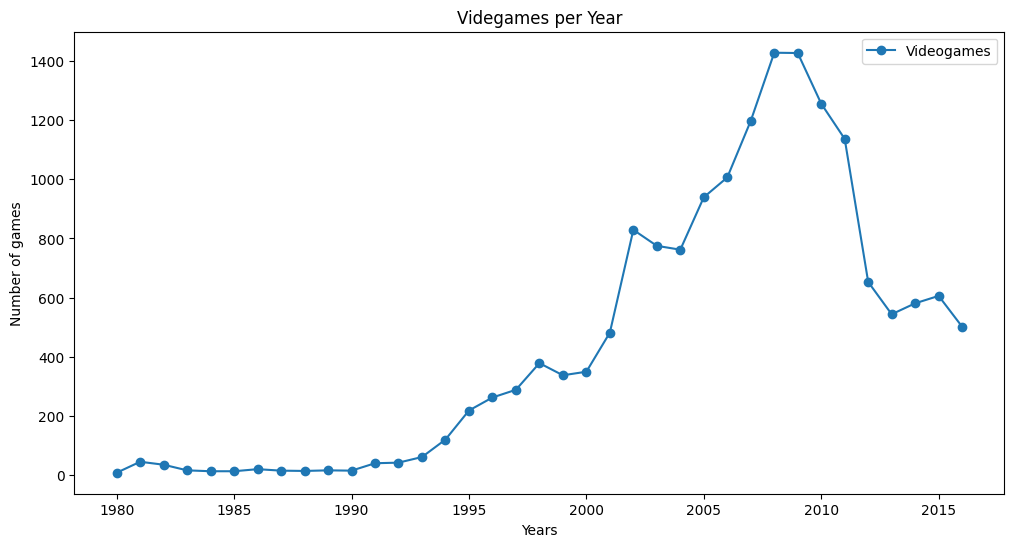

In [31]:
# Creamos un gráfico de líneas para los videojuegos lanzados por año
ax = games_year.plot(kind='line', 
                     x='year', 
                     y='games', 
                     marker='o', 
                     title='Videgames per Year', 
                     xlabel='Years', 
                     ylabel='Number of games',
                     figsize=[12, 6]
                     )
plt.legend(['Videogames'])
plt.show

En el gráfico de líneas se puede observar que desde el año 1980 comenzaron a venderse videjuegos; sin embargo, eran muy pocos los títulos que se publicaban.
A partir del año 2002 se comenzaron a publicar más de 800 títulos, llegando al máximo de 1,427 videojuegos publicados en el año 2008 y 2009, siendo los dos años con mayor publicación de videojuegos.
Para el año 2010 comenzó un descenso importante en la publicación de videjuegos, ya para el 2016 solamente se publicaron 502 títulos.

## 3.2 Ventas anuales por plataforma

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [32]:
# Agrupamos las ventas totales por plataforma
platform_sales = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_index(ascending=True).reset_index()
platform_sales

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [33]:
# Verificamos los valores estadísticos de las ventas por consola
platform_sales['total_sales'].describe()

count    238.000000
mean      37.045336
std       48.486384
min        0.020000
25%        3.620000
50%       16.055000
75%       50.477500
max      211.810000
Name: total_sales, dtype: float64

In [34]:
# Filtramos por las consolas con mayores ventas
top_platforms = platform_sales[platform_sales['total_sales'] > 60 ]
top_platforms

,platform,year_of_release,total_sales
12,3DS,2011,63.20
27,DS,2005,130.14
28,DS,2006,119.81
29,DS,2007,146.94
30,DS,2008,145.31
31,DS,2009,119.54
32,DS,2010,85.02
37,GB,1989,64.97
50,GBA,2001,61.53
51,GBA,2002,74.16


Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

In [35]:
# Creamos una tabla pivote con la diferente información requerida, Plataforma, Ventas totales, Año.
platform_pivot = top_platforms.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc='sum').fillna(0)
platform_pivot

platform,3DS,DS,GB,GBA,PS,PS2,PS3,PS4,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,
1989,0.0,0.00,64.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.0,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.0,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.0,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.0,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.0,0.00,0.00,0.00,96.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2001,0.0,0.00,0.00,61.53,0.00,166.43,0.00,0.00,0.00,0.00,0.00,0.00
2002,0.0,0.00,0.00,74.16,0.00,205.38,0.00,0.00,0.00,0.00,0.00,0.00
2003,0.0,0.00,0.00,0.00,0.00,184.31,0.00,0.00,0.00,0.00,0.00,0.00


Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

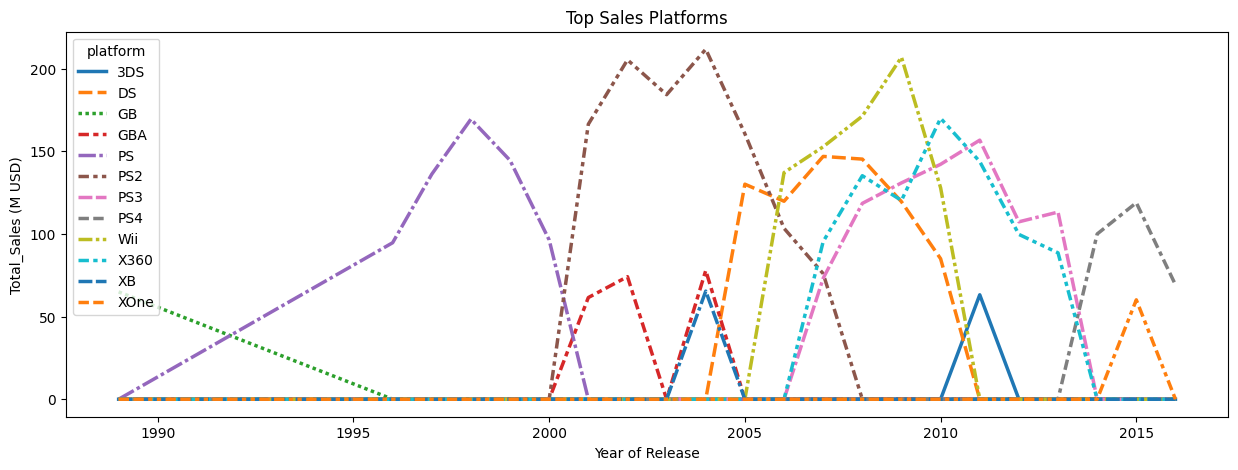

In [36]:
# Creamos un gráfico de líneas con la tabla pivote
plt.figure(figsize=(15,5))

sns.lineplot(data=platform_pivot, palette="tab10", linewidth=2.5)
plt.ylabel('Total_Sales (M USD)')
plt.xlabel('Year of Release')
plt.title('Top Sales Platforms')
plt.show()

En el gráfico anterior podemos ver la evolución de las diferentes plataformas de acuerdo a sus ventas, las 3 grandes compañias son Nintendo, Play Station de SONY y XBox de MICROSOFT.

De izquierda a derecha primero tenemos las plataformas de NINTENDO con al Game Boy (GB) que tuvo ventas significativas a principios de los 90's, desapareciendo totalmente en 1996; su sucesor fué el Game Boy Advance (GBA) que tuvo ventas únicamente en los primeros 5 años de la década de los 2000's. Para el año 2004 tenemos la consola Nintendo DS que tuvo ventas significativas durante 7 años aproximadamente desde el 2004 hasta el 2011, siendo superado por el Nintendo Wii que rápidamente alcanzó ventas importantes del año 2005 al 2011; finalmente tenemos al Nintendo 3DS con ventas únicamente en los años 2010 al 2012.

En la década de los 90's comenzó a tener popularidad de las consolas de SONY con el Play Station (PS) alcanzado su máximo auge en 1998, pero ya para inicios de la década de los 2000's lo reemplazó en ventas el Play Station 2 (PS2) superando las ventas del PS hasta el 2007, después lo reemplazó el Play Station 3 (PS3) que tuvo ventas hasta el año 2014, cuando salió el Play Station 4 (PS4). Aquí vemos una clara tendencia de vida de una plataforma de videojuegos.
    
En cuanto a las plataformas de MICROSOFT tenemos el XBox (XB) que comenzaron sus ventas alrededor del 2003 por un par de años, cuando surgió el XBox 360 (X360) que rápidamente alcanzó popularidad desde el 2006 hasta el 2014; finalmente tenemos el XBox One que reemplazó al XBox 360 en el año de 2014 y hasta el 2016.

## 3.3 Modelo para 2017

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

De acuerdo a la información anterior, la mayoría de plataformas y videojuegos se concentran a partir del año 2010, por lo que analizaremos la información en este segmento del tiempo para poder construir un modelo para el año 2017.

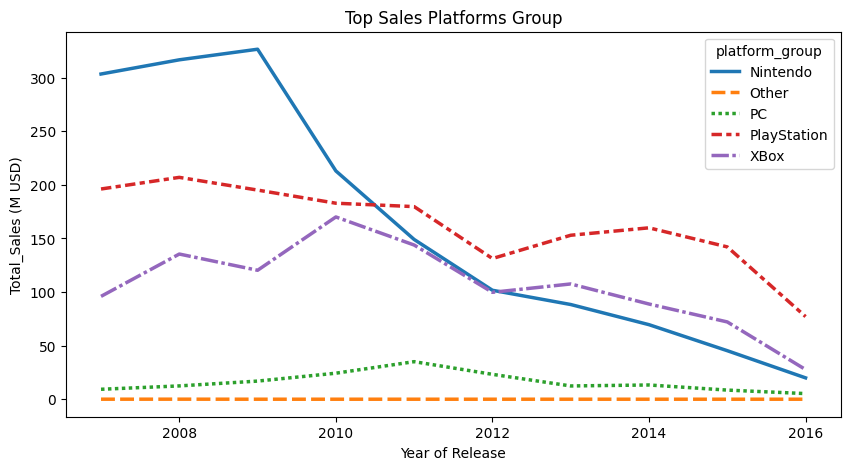

In [39]:
# Agrupamos las ventas totales por plataforma
platform_group_sales = df_games.groupby(['platform_group', 'year_of_release'])['total_sales'].sum().sort_index(ascending=True).reset_index()
platform_group_2007 = platform_group_sales[platform_group_sales['year_of_release'] > 2006]

# Creamos una tabla pivote con la diferente información requerida, Plataforma, Ventas totales, Año.
platform_group_pivot = platform_group_2007.pivot_table(index=['year_of_release'], columns='platform_group', values='total_sales', aggfunc='sum').fillna(0)

# Creamos un gráfico de líneas con la tabla pivote
plt.figure(figsize=(10,5))
sns.lineplot(data=platform_group_pivot, palette="tab10", linewidth=2.5)
plt.ylabel('Total_Sales (M USD)')
plt.xlabel('Year of Release')
plt.title('Top Sales Platforms Group')
plt.show()

En el gráfico anterior podemos observar la tendencia de las marcas de las plataformas, un claro desceso en las ventas.
La marca Nintendo pasó de ser la más popular en el año 2009 a 3er lugar en tan sólo 7 años, para el 2016 se mantuvieron las marcas Play Station y XBox, superando al gigante Nintendo.
En cuanto más datos los videojuegos para PC y otras marcas de consolas, no figuran como competencia de los 3 grandes de la industria de videojuegos mecionados anteriormente.

## 3.4 Datos recientes (5 años)

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

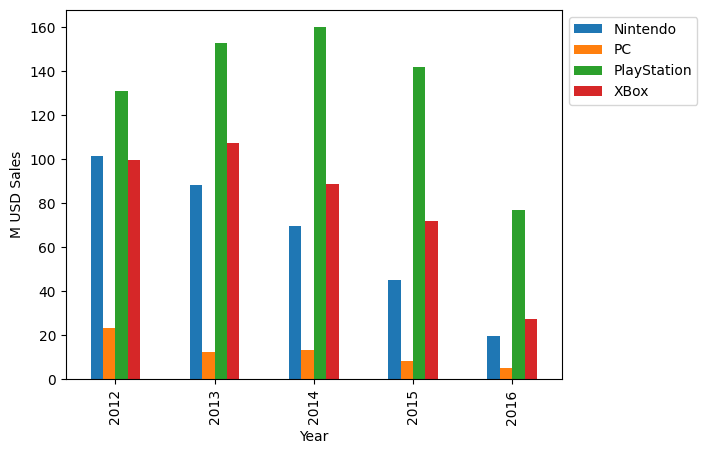

In [41]:
# Filtramos los datos mas relevantes para construir un modelo en el 2017
data_since_2012 = df_games.query('year_of_release >=2012')

# Agruapamos por informacion de Marca, Año y Ventas totales
games_per_platform = data_since_2012.groupby(['platform_group','year_of_release'])['total_sales'].sum().reset_index()

# Creamos una tabla pivote para ordenar la información
games_per_platform = games_per_platform.pivot(index='year_of_release',columns='platform_group',values='total_sales')

games_per_platform.plot(kind='bar', xlabel='Year', ylabel='M USD Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Si revisamos la información tan sólo 5 años antes del 2017, podemos notar que el la marca prdominante del mercado fué Play Station de Sony, seguida por una fuerte competencia entre Nintendo y XBox de Microsoft.

## 3.5 Plataformas Top

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

## 3.6 Diagrama de Caja

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

## 3.7 Reseñas de Usuarios y Profesionales

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

## 3.8 Otras Plataformas

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

## 3.9 Ventas por Géneros

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?